In [1]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame

In [2]:
dataset= pd.read_csv("datasource.csv",sep=';')
nsw_dataset = dataset[(dataset.STATE_NAME == "New South Wales")]
df=nsw_dataset.iloc[:, [2,8,9]]
df = df[df['MEDIAN_AGE'].notna()]
df

,SA2_MAIN16,MEDIAN_AGE,PERCENTAGE
131,101021007,49.6,17.1
132,101021008,38.4,19.5
133,101021009,36.7,16.5
134,101021010,36.4,17.1
135,101021011,38.8,22.2
...,...,...,...
702,128021537,35.0,14.3
703,128021538,37.3,18.0
704,128021607,38.6,22.8
705,128021608,39.6,21.4


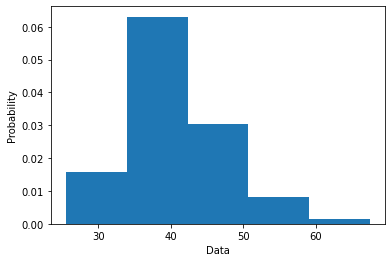

In [3]:
%matplotlib inline
plt.hist(df.MEDIAN_AGE, density=True, bins=5)  # density=False would make counts
plt.ylabel('Probability')
plt.xlabel('Data');

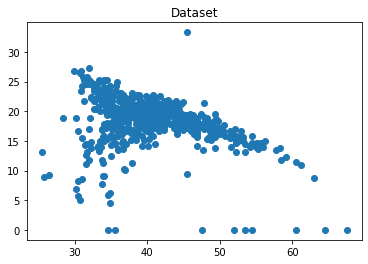

In [4]:
# Creating the data
x1 = df.MEDIAN_AGE.to_numpy()
x2 = df.PERCENTAGE.to_numpy()
X = np.array(list(zip(x1, x2))).reshape(len(x1), 2)
 
# Visualizing the data
plt.plot()
plt.title('Dataset')
plt.scatter(x1, x2)
plt.show()

In [5]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 24)
 
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
 
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeanModel.inertia_)
 
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeanModel.inertia_

C:\Users\Dell-672206\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  f"KMeans is known to have a memory leak on Windows "
C:\Users\Dell-672206\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  f"KMeans is known to have a memory leak on Windows "


In [6]:
for key, val in mapping1.items():
    print(f'{key} : {val}')

1 : 6.386248528042516
2 : 4.5256274950094975
3 : 3.8155003414824074
4 : 3.2868478279196194
5 : 2.9056697766182085
6 : 2.6759564469454227
7 : 2.40957967149612
8 : 2.202992660041591
9 : 2.1108467326298035
10 : 2.016548914739575
11 : 1.901793221946962
12 : 1.798498879395616
13 : 1.7043640859167215
14 : 1.6758523220570771
15 : 1.6148345802784303
16 : 1.567520003058768
17 : 1.537488956097521
18 : 1.5008933103506614
19 : 1.4447466580082855
20 : 1.4249249854998205
21 : 1.3773152248352412
22 : 1.3211052340462635
23 : 1.2981597892540313


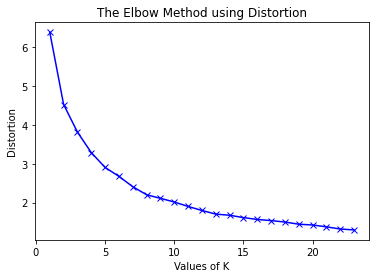

In [7]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

In [8]:
for key, val in mapping2.items():
    print(f'{key} : {val}')

1 : 35142.667944250854
2 : 17539.429085166863
3 : 12940.12253381515
4 : 9243.08988353095
5 : 6983.474900292126
6 : 5741.59523530769
7 : 4597.604484140803
8 : 4005.770844158982
9 : 3646.487269899882
10 : 3297.8375098064907
11 : 2998.5140407889403
12 : 2705.3729086531275
13 : 2469.718341525922
14 : 2283.7300568387936
15 : 2126.9729826973326
16 : 1964.3513113130523
17 : 1807.3791559691017
18 : 1664.46164739923
19 : 1602.8335018944583
20 : 1524.5807315978204
21 : 1415.756725774883
22 : 1344.522916122425
23 : 1262.6576033826816


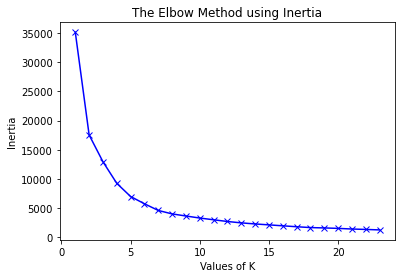

In [9]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

[[33.68615385 12.61076923]
 [47.80081967 17.13114754]
 [34.43741007 21.87553957]
 [56.46551724 10.23103448]
 [40.27305936 19.23881279]]
[1 4 4 4 4 2 1 1 1 4 1 3 1 1 1 3 1 3 3 3 3 4 1 4 4 4 1 4 1 1 1 4 2 1 4 4 1
 4 4 1 4 1 4 4 2 1 4 4 4 1 4 1 1 1 4 2 4 2 2 1 1 4 1 1 4 1 4 1 4 1 1 2 1 1
 4 4 2 4 4 1 3 1 4 4 4 1 4 1 1 4 2 2 4 4 4 1 2 1 2 2 2 4 4 4 4 2 2 4 1 2 2
 4 2 4 2 2 2 1 1 1 4 4 3 4 2 4 4 4 4 2 3 4 4 4 1 3 2 4 1 4 1 2 4 4 4 4 2 4
 4 4 0 0 1 3 1 3 4 1 1 3 1 3 4 3 1 1 1 4 1 1 1 3 1 2 4 1 4 4 1 4 4 1 1 1 1
 1 1 0 4 1 1 1 4 1 1 3 2 2 2 4 2 1 1 4 2 2 4 4 1 4 4 4 1 1 1 1 4 4 2 4 1 1
 4 4 4 4 4 2 2 4 0 3 0 1 4 0 0 1 1 1 1 4 1 4 1 4 1 4 1 4 1 1 4 1 4 1 1 4 3
 2 4 4 4 1 4 1 1 4 4 1 4 2 2 0 4 3 3 3 3 1 4 2 1 3 1 1 3 1 2 1 4 1 1 2 4 1
 4 4 1 4 4 4 4 2 4 1 1 4 2 2 2 2 2 4 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 1 2 0 4
 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 4 4 0 4 4 0 4 0 0 4 4 0 0 0 2 2 2 2
 4 4 4 2 2 2 4 0 4 2 2 2 2 0 4 4 4 4 4 0 0 2 4 0 0 4 0 1 4 0 4 4 4 4 4 0 0
 4 4 0 4 0 0 4 2 2 4 0 4 4 4 4 2 4 2 4 

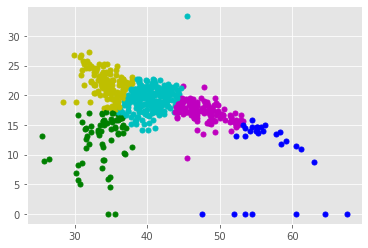

In [10]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5)
kmeans.fit(X)

centroid = kmeans.cluster_centers_
labels = kmeans.labels_

print (centroid)
print(labels)

colors = ["g.","m.","y.","b.","c.","k.","w.","r.","g.","b.","c.","m.","k."]

df['label']=""
#colors[labels[i]],
for i in range(len(X)):
    print ("coordinate:" , X[i], "label:", labels[i])
    plt.plot(X[i][0],X[i][1],colors[labels[i]],markersize=10)
    df['label'] = np.where((df['MEDIAN_AGE']==X[i][0]) & (df['PERCENTAGE']==X[i][1]), labels[i], 9999)
    
#plt.scatter(centroid[:,0],centroid[:,1], marker = "x", s=100, linewidths = 5, zorder =100)
#plt.show()



In [11]:
sa2 = pd.DataFrame(X, columns=['Median_Age','Percentage'])
sa2['cluster']= pd.DataFrame(labels, columns=['cluster'])
sa2['SA2_Main16']=""
for i in range(len(sa2)):
    if (sa2['Median_Age'][i]== df.iloc[i,1]) & (sa2['Percentage'][i] == df.iloc[i,2]):
        sa2['SA2_Main16'][i] = df.iloc[i,0]

C:\Users\Dell-672206\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [12]:
sa2

,Median_Age,Percentage,cluster,SA2_Main16
0,49.6,17.1,1,101021007
1,38.4,19.5,4,101021008
2,36.7,16.5,4,101021009
3,36.4,17.1,4,101021010
4,38.8,22.2,4,101021011
...,...,...,...,...
569,35.0,14.3,0,128021537
570,37.3,18.0,4,128021538
571,38.6,22.8,4,128021607
572,39.6,21.4,4,128021608


In [195]:
for class_ in range(5):
    print(f"Class: {class_}:")
    print(X[labels==class_])

Class: 0:
[[38.4 19.5]
 [36.7 16.5]
 [36.4 17.1]
 [38.8 22.2]
 [39.7 17.3]
 [39.5 18.5]
 [40.4 20.6]
 [43.4 21.2]
 [40.6 21.4]
 [41.3 21.1]
 [39.7 16.8]
 [38.5 20.3]
 [38.8 21.3]
 [42.4 19.1]
 [42.1 18.3]
 [41.5 21.3]
 [40.1 19.7]
 [39.9 19.8]
 [39.8 20.2]
 [40.7 18.2]
 [41.7 17.3]
 [39.2 19.7]
 [37.3 19.5]
 [39.4 20. ]
 [39.8 22.6]
 [41.7 19.9]
 [38.5 20.9]
 [42.6 20.3]
 [42.8 20.6]
 [40.  18.5]
 [42.3 21.8]
 [42.6 18.7]
 [41.6 18.2]
 [41.8 17.1]
 [43.4 20.5]
 [43.  21.6]
 [40.6 22.1]
 [41.5 21. ]
 [43.5 21.4]
 [43.  20.8]
 [44.1 20.8]
 [41.1 22.1]
 [40.3 18.6]
 [42.8 20.1]
 [42.4 21.1]
 [38.2 20.3]
 [38.4 20.9]
 [42.4 19.6]
 [39.6 20.6]
 [40.5 19.9]
 [39.  20.6]
 [42.8 20.1]
 [40.1 18.9]
 [39.3 18.3]
 [38.1 19.4]
 [41.2 19.1]
 [38.8 18.2]
 [43.4 19.2]
 [41.2 18.2]
 [41.8 18.1]
 [38.7 16.3]
 [40.5 18.3]
 [38.  21.1]
 [42.3 20.5]
 [39.4 21.1]
 [40.4 20.2]
 [41.3 17.8]
 [43.1 20.8]
 [38.8 19.1]
 [44.  21.8]
 [40.5 18.3]
 [42.7 20.1]
 [43.2 20. ]
 [40.5 21.2]
 [40.8 22.8]
 [38.9 19.2]
 [